In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.6.0
60000


라벨:  2


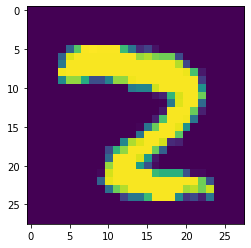

In [2]:
import matplotlib.pyplot as plt

plt.imshow(x_train[28])
print('라벨: ', y_train[28])

In [45]:
1 from PIL import Image
2 import OS, glob
3
4 print("PIL 라이브러리 import 완료!")

SyntaxError: invalid syntax (2744523752.py, line 1)

In [5]:
1 from PIL import Image
2 import os, glob
3
4 print("PIL 라이브러리 import 완료!")

SyntaxError: invalid syntax (2759694187.py, line 1)

In [6]:
#PIL 라이브러리 불러오기
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!") 

PIL 라이브러리 import 완료!


In [7]:
#가위 이미지 사이즈 변경(28x28)
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

  # 이미지를 불러와 파일마다 모두 28x28 사이즈로 바꾸어 저장
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [8]:
#바위 이미지 사이즈 변경(28x28)
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

  # 이미지를 불러와 파일마다 모두 28x28 사이즈로 바꾸어 저장
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

200  images to be resized.
200  images resized.
바위 이미지 resize 완료!


In [9]:
#보 이미지 사이즈 변경(28x28)
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

  # 이미지를 불러와 파일마다 모두 28x28 사이즈로 바꾸어 저장
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [42]:
#가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수로 데이터 불러오기
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    #라벨링 -> 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

ValueError: could not broadcast input array from shape (122,122,3) into shape (28,28,3)

In [13]:
#가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수로 데이터 불러오기
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    #라벨링 -> 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


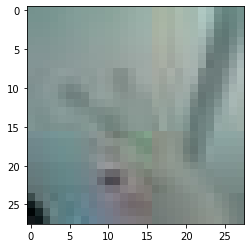

In [14]:
#이미지 불러오기
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation = 'relu')) 
model.add(keras.layers.Dense(3, activation = 'softmax')) #가위,바위,보 3개니까 3

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

In [16]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs = 10) #10번반복

Epoch 1/10
10/10 [==============================] - 3s 14ms/step - loss: 1.1070 - accuracy: 0.3200
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0990 - accuracy: 0.3333
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0898 - accuracy: 0.4567
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0874 - accuracy: 0.3333
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0697 - accuracy: 0.6233
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0653 - accuracy: 0.4200
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0458 - accuracy: 0.4333
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0351 - accuracy: 0.5633
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0298 - accuracy: 0.4967
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9925 - accuracy: 0.6100


In [17]:
#샘플 가위 이미지 사이즈 변경(28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)  

print("가위 샘플 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 샘플 이미지 resize 완료!


In [18]:
#샘플 바위 이미지 사이즈 변경(28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 샘플 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 샘플 이미지 resize 완료!


In [19]:
#샘플 보 이미지 사이즈 변경(28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 샘플 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 샘플 이미지 resize 완료!


In [43]:
#가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수로 데이터 불러오기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 300) #x_test,y_test만들기
x_test_norm = x_test/255.0 

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape)

SyntaxError: unexpected EOF while parsing (3084633531.py, line 7)

In [21]:
#이미지 불러오기
import matplotlib.pyplot as plt

plt.imshow(x_test_norm[0])
print('라벨: ', y_test[0])

NameError: name 'x_test_norm' is not defined

In [24]:
#가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수로 데이터 불러오기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 301) #x_test,y_test만들기
x_test_norm = x_test/255.0 

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (301, 28, 28, 3)
y_test shape: (301,)


라벨:  0


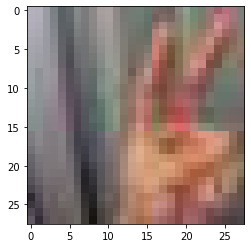

In [25]:
#이미지 불러오기
import matplotlib.pyplot as plt

plt.imshow(x_test_norm[0])
print('라벨: ', y_test[0])

In [26]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)

print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

10/10 - 0s - loss: 72.3885 - accuracy: 0.4352
test_loss : 72.38848114013672
test_accuracy : 0.43521595001220703


In [27]:
predicted_result = model.predict(x_test)  
predicted_labels = np.argmax(predicted_result, axis=1)

예측확률분포: [0.0016546 0.        0.9983454]
라벨: 0, 예측결과: 2


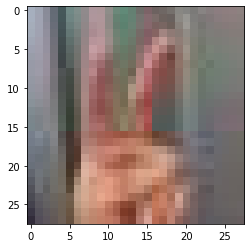

예측확률분포: [9.9974710e-01 0.0000000e+00 2.5294212e-04]
라벨: 1, 예측결과: 0


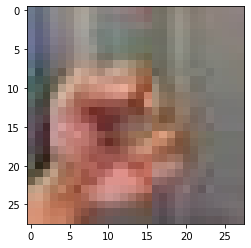

예측확률분포: [0. 0. 1.]
라벨: 1, 예측결과: 2


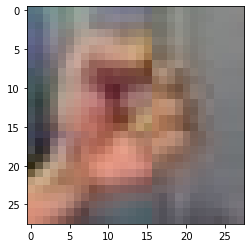

예측확률분포: [8.4385560e-10 1.7348124e-38 1.0000000e+00]
라벨: 1, 예측결과: 2


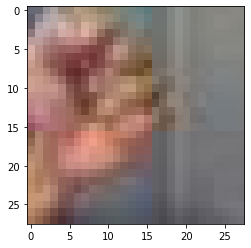

예측확률분포: [0. 0. 1.]
라벨: 0, 예측결과: 2


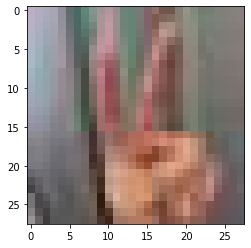

In [28]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [29]:
#PIL 라이브러리 불러오기
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!") 

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

  # 이미지를 불러와 파일마다 모두 122사이즈로 바꾸어 저장
    target_size=(122,122)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

PIL 라이브러리 import 완료!
100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [30]:
#가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수로 데이터 불러오기
import numpy as np

def load_data(img_path, number_of_data=1927):  # 가위바위보 이미지 개수 총합에 주의하세요.
    #라벨링 -> 가위 : 0, 바위 : 1, 보 : 2
    img_size=122
    color=3
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (1927, 122, 122, 3)
y_train shape: (1927,)


라벨:  0


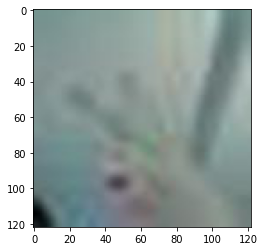

In [31]:
#이미지 불러오기
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [32]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape=(122, 122, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation = 'relu')) 
model.add(keras.layers.Dense(3, activation = 'softmax')) #가위,바위,보 3개니까 3

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 120, 120, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 60, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 26912)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                861216    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [33]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs = 10) #10번반복

Epoch 1/10
61/61 [==============================] - 1s 9ms/step - loss: 0.3448 - accuracy: 0.8947
Epoch 2/10
61/61 [==============================] - 0s 7ms/step - loss: 0.1711 - accuracy: 0.8962
Epoch 3/10
61/61 [==============================] - 0s 7ms/step - loss: 0.1711 - accuracy: 0.8962
Epoch 4/10
61/61 [==============================] - 0s 7ms/step - loss: 0.1711 - accuracy: 0.8962
Epoch 5/10
61/61 [==============================] - 0s 7ms/step - loss: 0.1711 - accuracy: 0.8962
Epoch 6/10
61/61 [==============================] - 0s 7ms/step - loss: 0.1711 - accuracy: 0.8962
Epoch 7/10
61/61 [==============================] - 0s 7ms/step - loss: 0.1711 - accuracy: 0.8962
Epoch 8/10
61/61 [==============================] - 0s 7ms/step - loss: 0.1711 - accuracy: 0.8962
Epoch 9/10
61/61 [==============================] - 0s 7ms/step - loss: 0.1711 - accuracy: 0.8962
Epoch 10/10
61/61 [==============================] - 0s 7ms/step - loss: 0.1711 - accuracy: 0.8962


In [34]:
#샘플 가위 이미지 사이즈 변경(28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)  

print("가위 샘플 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 샘플 이미지 resize 완료!


In [35]:
#샘플 바위 이미지 사이즈 변경(28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 샘플 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 샘플 이미지 resize 완료!


In [36]:
#샘플 보 이미지 사이즈 변경(28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 샘플 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 샘플 이미지 resize 완료!


In [37]:
#가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수로 데이터 불러오기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 301) #x_test,y_test만들기
x_test_norm = x_test/255.0 

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (301, 122, 122, 3)
y_test shape: (301,)


라벨:  0


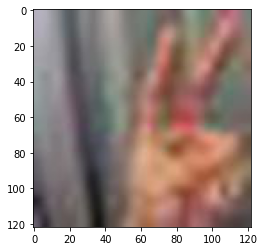

In [38]:
#이미지 불러오기
import matplotlib.pyplot as plt

plt.imshow(x_test_norm[0])
print('라벨: ', y_test[0])

In [39]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)

print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

10/10 - 0s - loss: 1.0951 - accuracy: 0.3355
test_loss : 1.0951006412506104
test_accuracy : 0.33554816246032715


In [40]:
predicted_result = model.predict(x_test)  
predicted_labels = np.argmax(predicted_result, axis=1)

예측확률분포: [0.34121427 0.32923183 0.32955393]
라벨: 2, 예측결과: 0


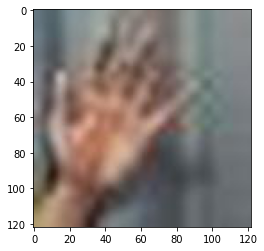

예측확률분포: [0.34121427 0.32923183 0.32955393]
라벨: 1, 예측결과: 0


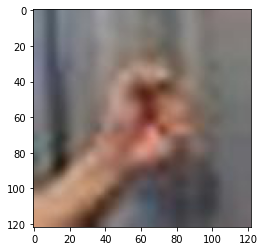

예측확률분포: [0.34121427 0.32923183 0.32955393]
라벨: 2, 예측결과: 0


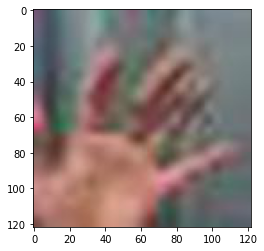

예측확률분포: [0.34121427 0.32923183 0.32955393]
라벨: 2, 예측결과: 0


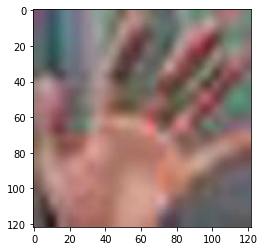

예측확률분포: [0.34121427 0.32923183 0.32955393]
라벨: 2, 예측결과: 0


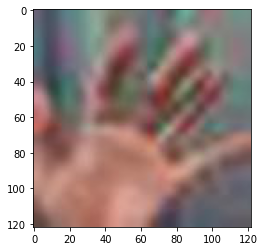

In [41]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()